<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. DNN Basis**
# Section 2. Logistic Regression

지난 시간에는 머신러닝의 지도학습 모델중 하나인 회귀 모델 중 가장 대표적인 선형 회귀(Linear Regression)에 대해 배워보았습니다. 이번 시간에는 머신러닝의 또다른 지도학습 모델인 분류 모델중 하나인 **로지스틱 회귀(Logistic Regression)**에 대해 배워보겠습니다. 로지스틱 회귀는 특징 정보 간의 관계를 선형적으로 조합한 후, 그 값을 확률값으로 바꾸어주는 머신러닝 모델입니다. 선형 회귀와 로지스틱 함수의 조합으로 구성되어 있어 분류모델이지만 로지스틱 회귀라고 부릅니다.

### _Objective_
1. **Logistic Function**: 분류 문제를 풀기 위해 알아야 할 기본적인 확률과 Logistic 함수에 대해서 알아봅니다. <br>
2. **Cross Entropy**: 확률 분포의 차이를 구하는 Cross-Entropy에 대해 알아봅니다.<br>
3. **Logistic Regression**: 분류 문제를 푸는 기본적인 머신러닝인 Logistic Regression에 대해 알아봅니다.<br>

In [2]:
%matplotlib inline
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 예제 데이터셋 불러오기
if not os.path.exists("cancer_dataset.csv"):
    !wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
cancer_df = pd.read_csv('cancer_dataset.csv')

# \[ 1. Logistic Funtion\]

## 1. 확률의 정의

----

분류 문제를 풀기 위해서는, 회귀 문제와 달리 결과 값의 형태가 **확률(Probability)** 로 나타나야 합니다. <br>
확률은 사건(부분집합)을 입력하면 숫자(확률값)으로 출력되는 함수입니다.

![](https://i.imgur.com/X4E0EcO.png)

확률의 세가지 공리 (콜모고로프의 공리)
1. 모든 사건에 대해 확률은 실수이고 0 또는 양수이다. 
$$
P(A) >= 0
$$
2. 표본공간(전체집합)이라는 사건(부분집합)에 대한 확률은 1이다.
$$
P(\Omega) = 1
$$
3. 공통 원소가 없는 두 사건의 합집합의 확률은 각각의 사건의 확률의 합이다.
$$
A \cap B = \emptyset \rightarrow P(A\cup B) = P(A) + P(B)
$$


결과 값의 형태가 확률로 나타나면, 우리는 결과를 **해석**할 수 있게 됩니다.<br>

## 2. Odds Ratio

Odds Ratio란, 해당 사건이 일어날 확률과 일어나지 않을 확률의 비율입니다.
$$
\mbox{일어날 확률} = P(x) \\
\mbox{일어나지 않을 확률} = 1-P(x) \\
\mbox{Odds Ratio} = \frac{\mbox{일어날 확률}}{\mbox{일어나지 않을 확률}} = \frac{P(x)}{1-P(x)}
$$


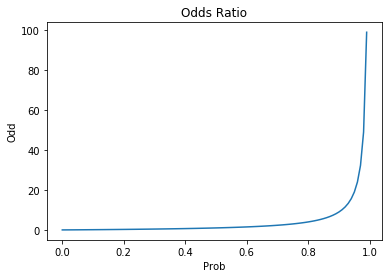

In [3]:
probs = np.arange(0,1,0.01)
odds = np.array([prob/(1-prob) for prob in probs])

plt.plot(probs, odds)
plt.title("Odds Ratio")
plt.xlabel('Prob')
plt.ylabel('Odd')
plt.show()

Odds Ratio도 확률의 의미를 가지고 있습니다. Odds의 값이 클수록, 확률이 커지는 관계에 있습니다. <br>
하지만 확률과 달리, 그 값의 범위가 $(0,\infty )$입니다.

## 3. Logit Function

Logit Function은 Odds Ratio에 Log를 씌운 함수입니다.
$$
\mbox{logit(x)} = Z = log_e(\frac{P(x)}{1-P(x)})
$$


In [4]:
probs = np.arange(0,1,0.001)
logits = np.array([np.log(prob/(1-prob)) for prob in probs])

/Users/kimdoyeong/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


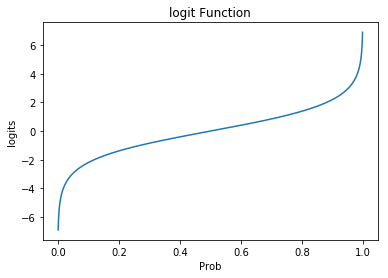

In [5]:
plt.plot(probs, logits)
plt.title("logit Function")
plt.xlabel('Prob')
plt.ylabel('logits')
plt.show()

Logit 함수는 출력 값의 범위가 실수 전체를 지칭하게 됩니다. Logit 함수는 확률 공간 $(0,1)$의 공간을 입력 공간으로 받고, 실수 공간$(-\infty,\infty)$의 공간을 출력 공간으로 가집니다.

## 4. Logistic(Sigmoid) Function

Logistic 함수는 Logit 함수의 역함수 입니다.<br>
아래는 유도과정입니다.<br>

$
\begin{align}
\mbox{z} = log_e(\frac{y}{1-y}) \\
\mbox{z} = - log_e(\frac{1}{y}-1) \\
\mbox{z} = - log_e(\frac{1}{y}-1) \\
e^{-z} = \frac{1}{y}-1  \\
y(e^{-z}+1) = 1 \\
y = \frac{1}{1+e^{-z}} \\
logistic(z) = \frac{1}{1+e^{-z}}
\end{align}
$


이렇게 유도된 Logistic 함수는 입력 값으로 실수 전체의 공간을 받아 확률 공간(0,1)로 매칭시키는 함수입니다.

In [7]:
real_values = np.linspace(-1000,1000,100)
logistics = np.array([1/(1+np.exp(-value)) for value in real_values])

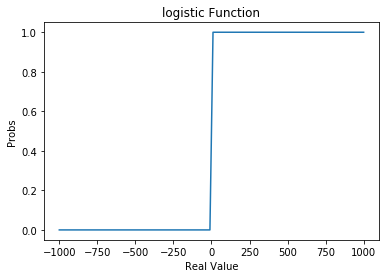

In [8]:
plt.plot(real_values, logistics)
plt.title("logistic Function")
plt.xlabel('Real Value')
plt.ylabel('Probs')
plt.show()

로지스틱 함수는 수학적으로 도출된 함수로, 실수 값 공간을 확률공간으로 변환할 때 주로 쓰입니다.

# \[ 2. Cross Entropy \]

분류 문제의 오차는 실제값의 확률(0,1)과 예측값의 확률(0,1)의 차이입니다. 확률 간의 차이를 구하는 Cross Entropy에 대해 배워보겠습니다.


참고 :
1. [wiki - 정보 엔트로피](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B3%B4_%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC)
2. [A short Introduction to Entropy, Cross-Entropy and KL-Divergence](https://www.youtube.com/watch?v=ErfnhcEV1O8)

## 1. Entropy

정보 이론에서는 모든 정보를 **확률(P)**로서 표현합니다.<br>

### (1) 정보의 크기

단일 정보의 중요도는 확률(P)이 낮을수록, 커지게 됩니다. <br>
정보의 중요도는 $-log(P)$로 나타내게 됩니다.

$$
\mbox{정보의 중요도} : h(x) = -logp(x) 
$$

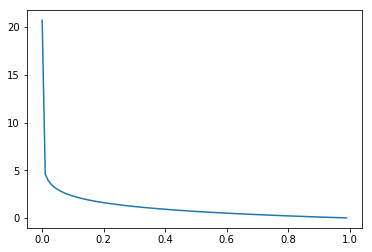

In [12]:
real_values = np.arange(1e-9,1,0.01)
informations = -np.log(real_values)
plt.plot(real_values,informations)
plt.show()

예를 들어 날씨가 자주 나빠지는 영국을 기준으로 정보의 중요도를 확인해보겠습니다.

|  \  | 오늘 아침 맑음 | 오늘 아침 흐림 | 
|----|----|----|
|확률 | 0.1 | 0.9 |
|중요도|$$-log(0.1)$$|$$-log(0.9)$$|

In [13]:
print("오늘 아침 맑다는 정보의 가치  : ",-np.log(0.1))
print("오늘 아침 흐리다는 정보의 가치 : ",-np.log(0.9))

오늘 아침 맑다는 정보의 가치  :  2.3025850929940455
오늘 아침 흐리다는 정보의 가치 :  0.10536051565782628


위의 결과를 보면, 희소하게 발생하는 정보일수록 그 정보의 중요도는 커집니다.

정보의 중요도를 아래와 같이 구성하면 3가지 성질이 생깁니다.
$$
\mbox{정보의 중요도} : h(x) = -logp(x) 
$$

1. 발생 가능성이 큰 사건은 정보량이 적어야 한다. 극단적인 경우, 반드시 발생하는 사건에는 아무런 정보도 없어야 한다.
2. 발생 가능성이 낮은 사건은 정보량이 많아야 한다.
3. 개별 사건들의 정보량은 더할 수 있어야 한다. 예를 들어, 동전을 두 번 던져서 두 번 다 앞면이 나온 사건의 정보량은 동전을 한 번 던져서 앞면이 나온 사건의 정보량의 2배이어야 한다.

### (2) 엔트로피

**Entropy**란, 정보의 기댓값을 의미합니다. 기댓값이란, 발생 확률과 그 크기의 곱의 평균을 뜻합니다. 엔트로피는 수식으로 아래와 같이 정의됩니다.

$$
\mbox{entropy} : H[x] = -\sum_{x}p(x)logp(x)
$$

위의 영국 날씨를 기준으로 엔트로피를 계산 해보면, 

|  \  | 오늘 아침 맑음 | 오늘 아침 흐림 | 
|----|----|----|
|확률 | 0.1 | 0.9 |
|중요도|$$-log(0.1)$$|$$-log(0.9)$$|

In [15]:
entropy = (-0.1*np.log(0.1)) + (-0.9*np.log(0.9))
print("영국 날씨의 엔트로피 : {:.3f}".format(entropy))

영국 날씨의 엔트로피 : 0.325


태국 날씨는 영국 날씨보다 더 기상천외하게 바뀝니다. 확률상으로 반반으로 날씨가 맑거나 흐립니다. 태국 날씨의 엔트로피는 어떻게 될까요?

|  \  | 오늘 아침 맑음 | 오늘 아침 흐림 | 
|----|----|----|
|확률 | 0.5 | 0.5 |
|중요도|$$-log(0.5)$$|$$-log(0.5)$$|

태국 날씨의 엔트로피 : 0.693


/Users/kimdoyeong/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/kimdoyeong/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


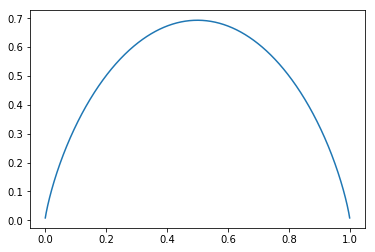

In [16]:
entropy = (-0.5*np.log(0.5)) + (-0.5*np.log(0.5))
print("태국 날씨의 엔트로피 : {:.3f}".format(entropy))


entropys = []
pxs = list(np.arange(0.0, 1.0 ,0.001))
for px in pxs:
    qx = 1 - px 
    entropy = (-px*np.log(px)) + (-qx*np.log(qx))
    entropys.append(entropy)
    
plt.plot(pxs, entropys)

태국 날씨의 엔트로피는 영국 날씨의 엔트로피보다 훨씬 큽니다. 태국의 날씨와 같이 예측하기 어려울수록 엔트로피의 크기는 커집니다. 엔트로피를 보통 **무질서의 정도**라고 설명하기도 합니다.

## 2. Cross-Entropy

분류 문제의 오차는 실제값의 확률(0,1)과 예측값의 확률(0,1)의 차이입니다. 확률 간의 차이를 구하는 Cross Entropy에 대해 알아보겠습니다. Cross-Entropy는 분류 문제에서 사용되는 손실 함수입니다. 기존의 MSE는 주로 회귀 문제에 적용되고, Cross-Entropy는 분류 문제에 적용됩니다.

환자에게 암이 발병했는지에 대한 확률 분포($p(x)$)가 있다고 생각해봅시다.<br>
환자가 실제로 암이 있을때의 실제 확률은 $p(x)=1$가 될 것이고, 환자에게 암이 없을때의 실제 확률은 $p(x)=0$이 될 것입니다.

In [17]:
sample_df = cancer_df.head(5).copy()
sample_df['p(x)'] = sample_df.label
sample_df

,age,tumor_size,label,p(x)
0,2.170865,3.087710,0.0,0.0
1,8.000731,5.237815,1.0,1.0
2,5.248661,5.851058,1.0,1.0
3,3.433496,4.278379,0.0,0.0
4,2.365321,3.508396,0.0,0.0


age와 tumor_size로 암 유무를 예측한 확률 분포($q(x)$)가 아래와 같다고 가정해보겠습니다.

In [18]:
sample_df['q(x)'] = [0.8,0.2,0.2,0.8,0.9]
sample_df

,age,tumor_size,label,p(x),q(x)
0,2.170865,3.087710,0.0,0.0,0.8
1,8.000731,5.237815,1.0,1.0,0.2
2,5.248661,5.851058,1.0,1.0,0.2
3,3.433496,4.278379,0.0,0.0,0.8
4,2.365321,3.508396,0.0,0.0,0.9


실제 확률분포 p(x)와 예측한 확률분포 q(x)의 Entropy 차이는 어떻게 구해야 할까요?<br>
그 차이는 KL-Divergence 식으로 구할 수 있습니다. KLD는 두 분포의 차이량에 대한 기대값을 표현합니다.

$$
KL(p||q) = \sum p(x)logp(x) - p(x)logq(x)
$$

위의 경우에서 $p(x)$가 가지는 값은 0 또는 1뿐이므로 $p(x)logp(x)$는 항상 0이 됩니다.

$$
crossentropy(p,q) = \sum -p(x)logq(x)
$$

이제 p의 값이 1일 때와 0일 때를 각각 구분지어서 보면,

$$
crossentropy(p,q) = -plogq-(1-p)log(1-q)
$$

In [19]:
cross_entropy = -(
1*np.log(0.2) + (1-0)*np.log(0.2) + (1)*np.log(0.2)
+ 1*np.log(0.2) + 1*np.log(0.1))
print("cross entropy 값 : {:.3f}".format(cross_entropy))

cross entropy 값 : 8.740


좀 더 성능이 좋아진 분류기를 통해 예측을 해보았다고 하면,

In [21]:
sample_df['q2(x)'] = [0.01,0.99,0.99,0.01,0.01]
sample_df

,age,tumor_size,label,p(x),q(x),q2(x)
0,2.170865,3.087710,0.0,0.0,0.8,0.01
1,8.000731,5.237815,1.0,1.0,0.2,0.99
2,5.248661,5.851058,1.0,1.0,0.2,0.99
3,3.433496,4.278379,0.0,0.0,0.8,0.01
4,2.365321,3.508396,0.0,0.0,0.9,0.01


In [22]:
cross_entropy = -(
1*np.log(0.99) + (1-0)*np.log(1-0.01) + (1-0)*np.log(1-0.01)
+ 1*np.log(0.99) + 1*np.log(0.99))
print("cross entropy 값 : {:.3f}".format(cross_entropy))

cross entropy 값 : 0.050


cross entropy의 값은 크게 줄어든 것을 확인할 수 있습니다.<br>
분류기의 학습은 이 Cross entropy가 줄어드는 방향으로 학습을 시키면 됩니다.

# \[ 3. 로지스틱 회귀 \]

### 예제 데이터 ) 암 환자 데이터 셋

In [9]:
if not os.path.exists("cancer_dataset.csv"):
    !wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
cancer_df = pd.read_csv('cancer_dataset.csv')

--2019-10-11 13:22:23--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com... 52.219.56.85
Connecting to s3.ap-northeast-2.amazonaws.com|52.219.56.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2958 (2.9K) [text/csv]
Saving to: 'cancer_dataset.csv'

cancer_dataset.csv  100%[===================>]   2.89K  --.-KB/s    in 0s      

2019-10-11 13:22:24 (47.8 MB/s) - 'cancer_dataset.csv' saved [2958/2958]



In [10]:
cancer_df.describe()

,age,tumor_size,label
count,100.000000,100.000000,100.00
mean,4.218584,4.463655,0.45
std,1.949688,2.264897,0.50
min,0.494542,0.656397,0.00
25%,2.750747,2.832193,0.00
50%,3.849528,3.766226,0.00
75%,5.405780,5.921538,1.00
max,9.670666,11.170589,1.00


### 데이터 시각화

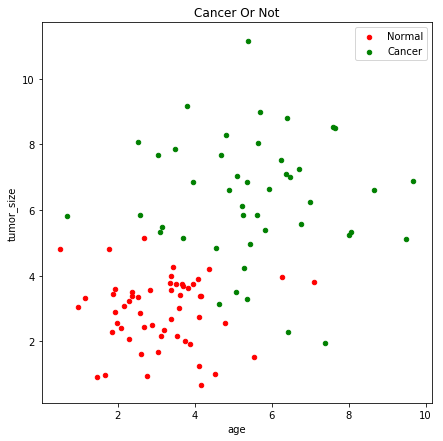

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# 0: 정상
cancer_df[cancer_df.label==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
cancer_df[cancer_df.label==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(['Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

## 1. 로지스틱 회귀식 설정하기

현재 암환자 데이터셋의 독립변수로는 tumor_size($x_1$)와 age($x_2$)가 있고, 종속변수로는 label이 있습니다.

In [23]:
# MinMax Normalization 적용
cancer_df = (cancer_df-cancer_df.min())/(cancer_df.max()-cancer_df.min())

x_1 = cancer_df.tumor_size
x_2 = cancer_df.age
y = cancer_df.label

# weight 모두 0.1로 초기화
w_0,w_1,w_2 = np.random.random(3)

로지스틱 회귀 모델은 아래의 두 단계로 이루어져 있습니다.<br>
$
z = w_0 + w_1x_1 + w_2x_2 \\
y = \frac{1}{1+e^{-z}}
$

In [24]:
# fix me! # 로지스틱 회귀 모델 코드를 작성해 주세요. y의 변수명은 'prob'으로 해주세요!

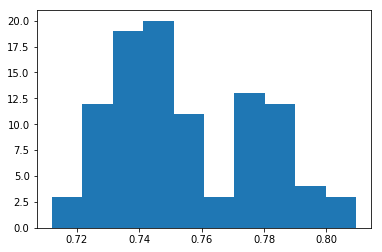

In [25]:
plt.hist(prob)
plt.show()

prob의 값은 0과 1사이에 확률의 값으로 존재한다는 것을 알 수 있습니다.

## 2. 손실함수, 미분함수 정의하기

### (1) 손실함수 정의하기

손실함수의 식은 아래와 같이 정의할 수 있습니다.
$$
Loss(W) = \frac{1}{m}\sum_{i=1}^{m}CrossEntropy(y_{true},y_{pred})\\
=- \frac{1}{m}\sum_{i=1}^{m}y_{true}log(y_{pred}) + (1-y_{true})(log(1-y_{pred}))
$$

In [26]:
# fix me! # crossentopy 식을 numpy로 작성해주세요!
crossentropy

0.8510567837934505

### (2) 미분함수 정의하기

위의 손실함수를 각 Weight 별로 미분해주면, 아래의 수식이 나타나게 됩니다.

$$
\frac{\partial Loss}{\partial W_j} = \frac{1}{m}\sum_{i=1}^{m}(y_{pred}^i - y_{true}^i)x_j^i
$$


In [27]:
# fix me! # gradient descent를 위해 기울기 dw0, dw1, dw2를 구현해주세요

## 3. Gradient Descent로 학습하기

학습을 위해 선형 회귀에서 적용했던 방식과 마찬가지로 경사하강법을 적용하면 됩니다.

$$
W_{new} = W_{old} - \alpha * \frac{\partial loss}{\partial W} 
$$

학습률과 학습횟수는 아래와 같이 결정하겠습니다.

1. learning Rate : 0.01
2. Epoch : 1000

In [28]:
# 갱신된 weight와 mse 저장
# w_0, w_1, w_2 가 각각 들어있는 w_0_history list, w_1_history list와
# crossentropy가 들어있는 loss_history list를 만들어주세요
# fix me!

alpha = 1e-1 # 학습률
epoch = 500

for i in range(epoch):
    # 이전 가중치 가져오기
    # fix me
    
    # 가져온 가중치에 대한 미분값 갱신
    # fix me!
    
    # 경사_하강법을 통한 가중치 갱신
    # fix me!
    
    # crossentropy loss 함수 갱신
    # fix me!

    # 결과 저장
    # fix me!

## 4. 결과 확인하기

### (1) 손실함수 그래프

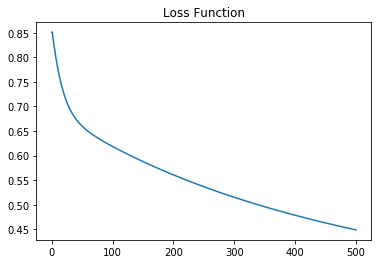

In [29]:
plt.title("Loss Function")
plt.plot(loss_history)
plt.show()

### (2) 정답값과 예측값의 비교

$$
z = w_0 + w_1x_1 + w_2x_2 \\
y = \frac{1}{1+e^{-z}}
$$

위 식에서 $y = 0.5$일 때, $z=0$이 됩니다. 즉 암을 판별하는 경계선은

$$
0 = w_0 + w_1x_1 + w_2x_2
$$

가 됩니다.

In [30]:
new_w0 = w_0_history[-1]
new_w1 = w_1_history[-1]
new_w2 = w_2_history[-1]

x_0 = [-new_w0/new_w1,0] # x_1 절편
y_0 = [0,-new_w0/new_w2] # x_2 절편

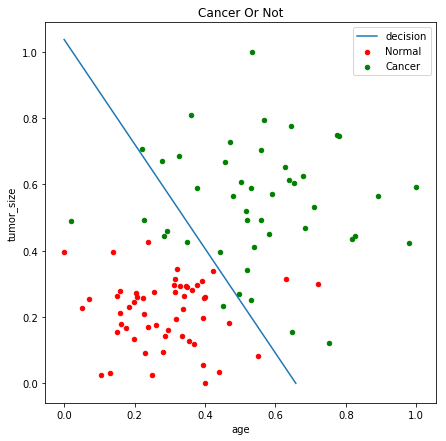

In [31]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.plot(x_0,y_0) # Decision boundary 그리기

# 0: 정상
cancer_df[cancer_df.label==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
cancer_df[cancer_df.label==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(["decision",'Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/09/16


---